# **구글 드라이브 연동, 압축 해제 등**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
import zipfile

local_zip = '/content/drive/My Drive/Colab_Notebooks/Deep_learning/assignment2.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Mounted at /content/drive


# **Imbalanced Dataset -> Balanced Dataset**





> Class별로 directory 분류



In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/tmp'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training pictures
train_1_dir = os.path.join(train_dir, 'Airbus')
train_2_dir = os.path.join(train_dir, 'Boeing')
train_3_dir = os.path.join(train_dir, 'Canadair')
train_4_dir = os.path.join(train_dir, 'Embraer')
train_5_dir = os.path.join(train_dir, 'Eurofighter')
train_6_dir = os.path.join(train_dir, 'Lockheed_Martin')
train_7_dir = os.path.join(train_dir, 'McDonnell_Douglas')
train_8_dir = os.path.join(train_dir, 'Robin')
train_9_dir = os.path.join(train_dir, 'Saab')
train_10_dir = os.path.join(train_dir, 'Yakovlev')

# Directory with our test plane pictures
test_1_dir = os.path.join(test_dir, 'Airbus')
test_2_dir = os.path.join(test_dir, 'Boeing')
test_3_dir = os.path.join(test_dir, 'Canadair')
test_4_dir = os.path.join(test_dir, 'Embraer')
test_5_dir = os.path.join(test_dir, 'Eurofighter')
test_6_dir = os.path.join(test_dir, 'Lockheed_Martin')
test_7_dir = os.path.join(test_dir, 'McDonnell_Douglas')
test_8_dir = os.path.join(test_dir, 'Robin')
test_9_dir = os.path.join(test_dir, 'Saab')
test_10_dir = os.path.join(test_dir, 'Yakovlev')



> 각 Class에 있는 Dataset 개수 확인



In [ ]:
print('total training 1 images:', len(os.listdir(train_1_dir)))
print('total training 2 images:', len(os.listdir(train_2_dir)))
print('total training 3 images:', len(os.listdir(train_3_dir)))
print('total training 4 images:', len(os.listdir(train_4_dir)))
print('total training 5 images:', len(os.listdir(train_5_dir)))
print('total training 6 images:', len(os.listdir(train_6_dir)))
print('total training 7 images:', len(os.listdir(train_7_dir)))
print('total training 8 images:', len(os.listdir(train_8_dir)))
print('total training 9 images:', len(os.listdir(train_9_dir)))
print('total training 10 images:', len(os.listdir(train_10_dir)))

print('total test 1 images:', len(os.listdir(test_1_dir)))
print('total test 2 images:', len(os.listdir(test_2_dir)))
print('total test 3 images:', len(os.listdir(test_3_dir)))
print('total test 4 images:', len(os.listdir(test_4_dir)))
print('total test 5 images:', len(os.listdir(test_5_dir)))
print('total test 6 images:', len(os.listdir(test_6_dir)))
print('total test 7 images:', len(os.listdir(test_7_dir)))
print('total test 8 images:', len(os.listdir(test_8_dir)))
print('total test 9 images:', len(os.listdir(test_9_dir)))
print('total test 10 images:', len(os.listdir(test_10_dir)))

total training 1 images: 867
total training 2 images: 1466
total training 3 images: 267
total training 4 images: 467
total training 5 images: 66
total training 6 images: 67
total training 7 images: 467
total training 8 images: 66
total training 9 images: 134
total training 10 images: 67
total test 1 images: 433
total test 2 images: 734
total test 3 images: 133
total test 4 images: 233
total test 5 images: 34
total test 6 images: 33
total test 7 images: 233
total test 8 images: 34
total test 9 images: 66
total test 10 images: 33




> Training dataset = 1500, Test dataset = 750으로 Upsampling (Data Augmentation)



In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps
def dataaugmentation(file_path,num):
    #다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
    num_augmented_images = num+1 - len(os.listdir(file_path))

    file_names = os.listdir(file_path)
    total_origin_image_num = len(file_names)
    augment_cnt = 1

    for i in range(1, num_augmented_images):
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        file_name = file_names[change_picture_index]
        
        origin_image_path = file_path +'/'+ file_name
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)
        
        if(random_augment == 1):
            #이미지 좌우 반전
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + '/inverted_' + str(augment_cnt) + '.png')
            
        elif(random_augment == 2):
            #이미지 기울이기
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + '/rotated_' + str(augment_cnt) + '.png')
            
        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + '/noiseAdded_' + str(augment_cnt) + '.png')
            
        augment_cnt += 1

dataaugmentation(train_1_dir,1500),dataaugmentation(train_2_dir,1500)
dataaugmentation(train_3_dir,1500),dataaugmentation(train_4_dir,1500)
dataaugmentation(train_5_dir,1500),dataaugmentation(train_6_dir,1500)
dataaugmentation(train_7_dir,1500),dataaugmentation(train_8_dir,1500)
dataaugmentation(train_9_dir,1500),dataaugmentation(train_10_dir,1500)
dataaugmentation(test_1_dir,750),dataaugmentation(test_2_dir,750)
dataaugmentation(test_3_dir,750),dataaugmentation(test_4_dir,750)
dataaugmentation(test_5_dir,750),dataaugmentation(test_6_dir,750)
dataaugmentation(test_7_dir,750),dataaugmentation(test_8_dir,750)
dataaugmentation(test_9_dir,750),dataaugmentation(test_10_dir,750)

(None, None)



> Upsampling 후 개수 확인



In [ ]:
print('total training 1 images:', len(os.listdir(train_1_dir)))
print('total training 2 images:', len(os.listdir(train_2_dir)))
print('total training 3 images:', len(os.listdir(train_3_dir)))
print('total training 4 images:', len(os.listdir(train_4_dir)))
print('total training 5 images:', len(os.listdir(train_5_dir)))
print('total training 6 images:', len(os.listdir(train_6_dir)))
print('total training 7 images:', len(os.listdir(train_7_dir)))
print('total training 8 images:', len(os.listdir(train_8_dir)))
print('total training 9 images:', len(os.listdir(train_9_dir)))
print('total training 10 images:', len(os.listdir(train_10_dir)))

print('total test 1 images:', len(os.listdir(test_1_dir)))
print('total test 2 images:', len(os.listdir(test_2_dir)))
print('total test 3 images:', len(os.listdir(test_3_dir)))
print('total test 4 images:', len(os.listdir(test_4_dir)))
print('total test 5 images:', len(os.listdir(test_5_dir)))
print('total test 6 images:', len(os.listdir(test_6_dir)))
print('total test 7 images:', len(os.listdir(test_7_dir)))
print('total test 8 images:', len(os.listdir(test_8_dir)))
print('total test 9 images:', len(os.listdir(test_9_dir)))
print('total test 10 images:', len(os.listdir(test_10_dir)))

total training 1 images: 1500
total training 2 images: 1500
total training 3 images: 1500
total training 4 images: 1500
total training 5 images: 1500
total training 6 images: 1500
total training 7 images: 1500
total training 8 images: 1500
total training 9 images: 1500
total training 10 images: 1500
total test 1 images: 750
total test 2 images: 750
total test 3 images: 750
total test 4 images: 750
total test 5 images: 750
total test 6 images: 750
total test 7 images: 750
total test 8 images: 750
total test 9 images: 750
total test 10 images: 750


# **Resnet50**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

base_model = ResNet50(weights='imagenet', input_tensor=Input(shape=(150, 150, 3)))
#base_model.summary()

x = base_model.get_layer('avg_pool').output
# Create output layer with a single node and sigmoid activation
output = layers.Dense(10, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________



> Adam (learning rate = 0.001)



In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use Categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow test images in batches of 20 using test_datagen generator
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 15000 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=15,
      validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
469/469 [==============================] - 130s 267ms/step - loss: 1.4206 - acc: 0.5222 - val_loss: 2.5707 - val_acc: 0.1000
Epoch 2/15
469/469 [==============================] - 125s 266ms/step - loss: 0.5683 - acc: 0.7907 - val_loss: 1.1697 - val_acc: 0.6297
Epoch 3/15
469/469 [==============================] - 125s 266ms/step - loss: 0.4024 - acc: 0.8521 - val_loss: 1.3756 - val_acc: 0.5847
Epoch 4/15
469/469 [==============================] - 125s 265ms/step - loss: 0.3646 - acc: 0.8661 - val_loss: 0.7962 - val_acc: 0.7327
Epoch 5/15
469/469 [==============================] - 124s 264ms/step - loss: 0.2911 - acc: 0.8954 - val_loss: 0.8957 - val_acc: 0.7304
Epoch 6/15
469/469 [==============================] - 125s 266ms/step - loss: 0.2768 - acc: 0.8997 - val_loss: 0.4890 - val_acc: 0.8351
Epoch 7/15
469/469 [==============================] - 124s 265ms/step - loss: 0.2287 - acc: 0.9158 - val_loss: 0.9330 - val_acc: 0.7304
Epoch 8/15
469/469 [============================

# **그래프**

Text(0.5, 1.0, 'Training and validation loss')

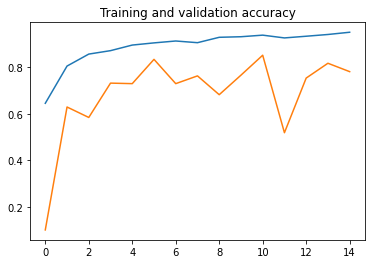

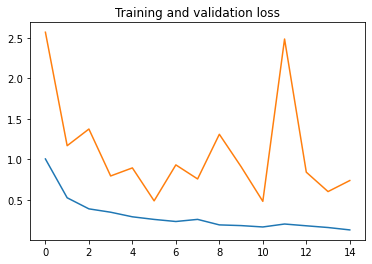

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')